In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
from aggregation import Aggregator, Subject
from astropy.io import ascii

In [2]:
aggregator        = Aggregator('reductions/point_reducer_hdbscan_box_the_jets.csv', 
                               'reductions/shape_reducer_hdbscan_box_the_jets.csv')
aggregator_merged = Aggregator('reductions/point_reducer_hdbscan_box_the_jets_merged.csv', 
                               'reductions/shape_reducer_hdbscan_box_the_jets_merged.csv')

In [3]:
multijet_subjects = ascii.read('multiplejets_20220209.txt', format='fast_no_header')

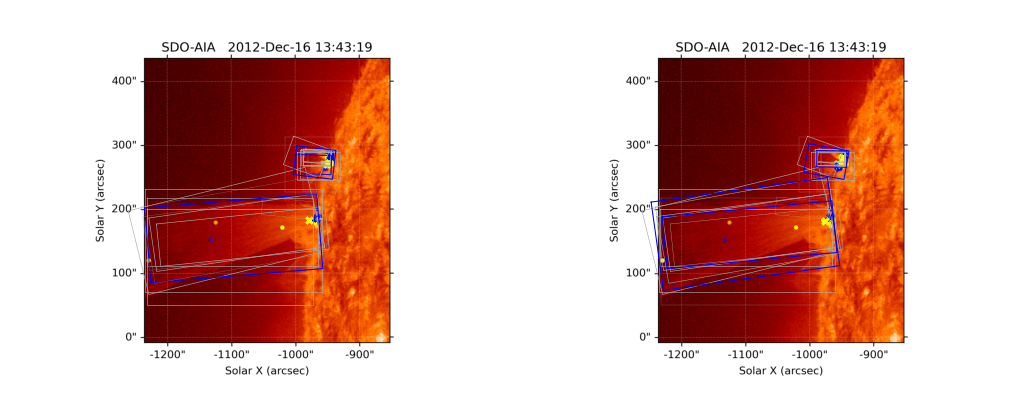

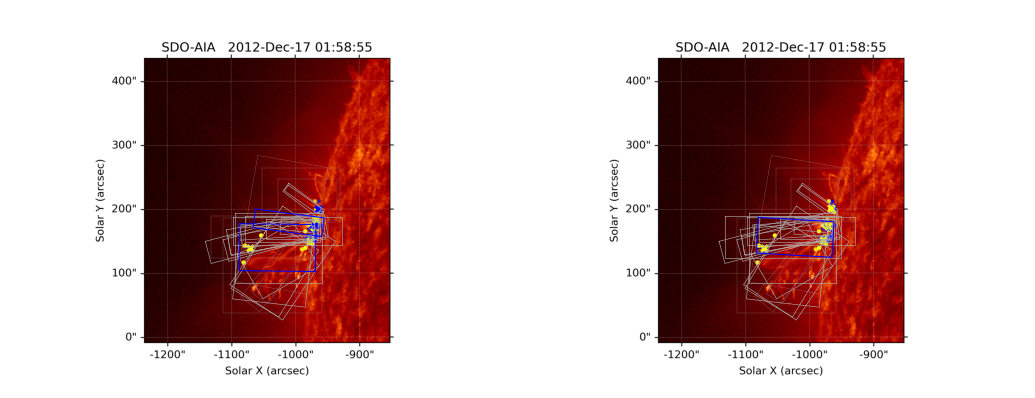

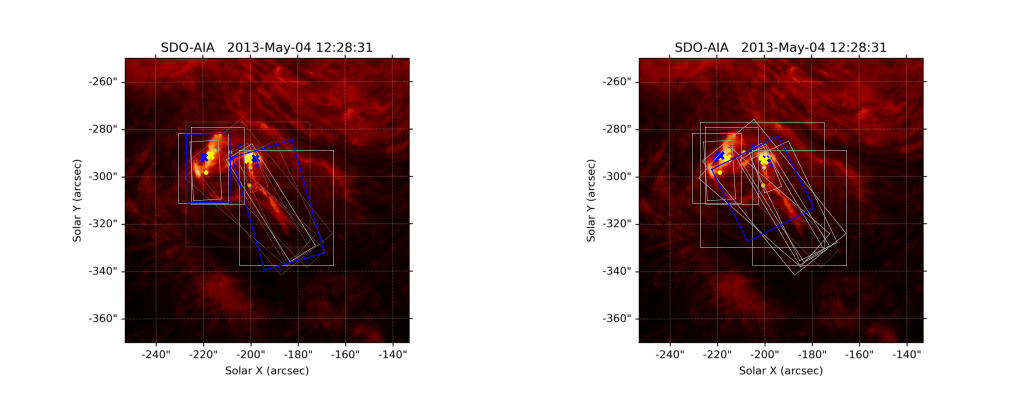

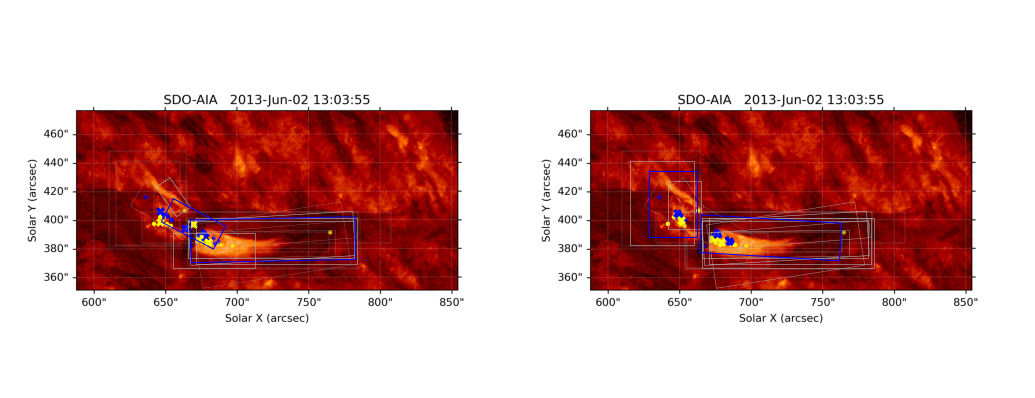

62832745 has no classification data!
62833293 has no classification data!
62833614 has no classification data!
62833769 has no classification data!
62835807 has no classification data!
68916604 has no classification data!


In [4]:
plt.style.use('default')
for subject in multijet_subjects[:10]:
    subject_rows = aggregator.points_data[:][aggregator.points_data['subject_id']==subject[0]]
    nsubjects = len(subject_rows['data.frame0.T1_tool0_points_x'])
    if nsubjects > 0:
        fig, axs = plt.subplots(1, 2, figsize=(7,6), dpi=150, sharex=True, sharey=True)
        aggregator.plot_subject(subject[0], 'T1', axs[0])
        aggregator.plot_subject(subject[0], 'T5', axs[0])
        aggregator_merged.plot_subject(subject[0], 'T1', axs[1])
        axs[0].axis('off')
        fig.tight_layout()
        plt.show()
    else:
        print(f"{subject[0]} has no classification data!")        

In [6]:
subjecti = Subject(70439051)
print(subjecti.raw)

{'locations': [{'image/png': 'https://panoptes-uploads.zooniverse.org/subject_location/937adf1e-2a7f-47da-aee7-0694c29ca76c.png'}, {'image/png': 'https://panoptes-uploads.zooniverse.org/subject_location/3bcd82f6-d9d6-439a-9666-a7c5aa8b1c41.png'}, {'image/png': 'https://panoptes-uploads.zooniverse.org/subject_location/73367b8f-8001-4680-88eb-1e80e972249e.png'}, {'image/png': 'https://panoptes-uploads.zooniverse.org/subject_location/b0e6fbe8-48d2-4856-bbc0-4dccce0d6be1.png'}, {'image/png': 'https://panoptes-uploads.zooniverse.org/subject_location/01607be4-c6a5-43e3-aba9-e56fbd3467b2.png'}, {'image/png': 'https://panoptes-uploads.zooniverse.org/subject_location/bb6885e3-8055-4b43-a898-7000540880bc.png'}, {'image/png': 'https://panoptes-uploads.zooniverse.org/subject_location/e4bbd31e-d1d3-45fb-b3b1-8e00a5711da2.png'}, {'image/png': 'https://panoptes-uploads.zooniverse.org/subject_location/e35e1e4f-e396-4c28-8fbf-30e001c951a9.png'}, {'image/png': 'https://panoptes-uploads.zooniverse.org/su